In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the IMDB dataset
# We will only keep the top 10,000 most frequently occurring words in the training data
# The rare words will be discarded to keep the size of the data manageable
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 5s 0us/step


# Pad sequences
In NLP, data is often in the form of sequences of words. However, these sequences can vary in length. Most machine learning algorithms require input data to be in a consistent format, i.e., they need to have the same length. Padding is the process of standardizing the length of the sequences by adding zeros to the shorter sequences until they reach the same length as the longest sequence. In this code, `pad_sequences` is used to ensure that all sequences in the dataset have a length of 500 words.

In [ ]:
# Pad sequences with max_len
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Embedding Layer
The Embedding layer is used to convert each word into a dense vector of fixed size. The Embedding layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array, resulting in an output of shape (batch, sequence, embedding). In this code, the Embedding layer is used to convert the integer-encoded vocabulary of size 10,000 into dense vectors of size 32.

In [ ]:
# Define the RNN model
model = tf.keras.models.Sequential([
    # Embedding layer to convert integers to dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, 32),
    # Simple RNN layer
    tf.keras.layers.SimpleRNN(32),
    # Dense layer for output prediction
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In the above code, the Dense layer is used to output the prediction of the model. The 'sigmoid' activation function is used to output a probability value between 0 and 1, indicating the sentiment of the review (1 being positive and 0 being negative).

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In the above code, 'adam' optimizer is used, which is an algorithm for first-order gradient-based optimization of stochastic objective functions. The 'binary_crossentropy' loss function is used as it is a good loss function for binary classification problems. The 'accuracy' metric is used to monitor the training and testing steps.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 355s 450ms/step - loss: 0.5900 - accuracy: 0.6767 - val_loss: 0.5559 - val_accuracy: 0.7110
Epoch 2/5
782/782 [==============================] - 419s 536ms/step - loss: 0.3856 - accuracy: 0.8312 - val_loss: 0.4820 - val_accuracy: 0.8031
Epoch 3/5
782/782 [==============================] - 354s 453ms/step - loss: 0.2191 - accuracy: 0.9159 - val_loss: 0.4680 - val_accuracy: 0.8019
Epoch 4/5
782/782 [==============================] - 316s 405ms/step - loss: 0.1000 - accuracy: 0.9676 - val_loss: 0.5501 - val_accuracy: 0.8126
Epoch 5/5
782/782 [==============================] - 316s 404ms/step - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.6708 - val_accuracy: 0.8018


# Overfitting Detected

From the output, we can see that our model is overfitting. This is evident as our training accuracy keeps increasing, reaching 98.7% in the 5th epoch, while our validation accuracy doesn't improve significantly after the 2nd epoch.

Moreover, the validation loss starts to increase after the 2nd epoch while the training loss keeps decreasing. This indicates that our model is learning the training data too well, including its noise and outliers, and fails to generalize well to new, unseen data.

# Ways to Address Overfitting

1. **Regularization**: Techniques like L1, L2, and dropout can help by adding a penalty to the loss function based on the complexity of the model.

2. **Early Stopping**: We can stop the training process before the model starts to overfit. This can be done by monitoring the model's performance on the validation set after each epoch and stopping the training when the performance starts to degrade.

3. **Increasing the Dataset**: Overfitting generally occurs when the model is too complex relative to the amount and complexity of the training data. By increasing the amount of training data, the model will have more examples to learn from, which can help it generalize better.

4. **Reducing the Model's Complexity**: If the model is too complex, it can easily fit the noise in the training data and overfit. By reducing the complexity of the model (e.g., reducing the number of layers or the number of units in each layer), we can make it harder for the model to fit the noise and hence reduce overfitting.

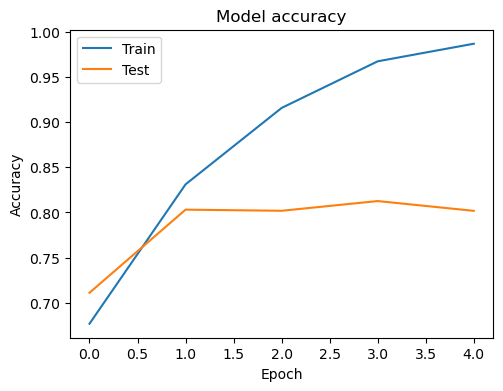

In [ ]:
# Plot the accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

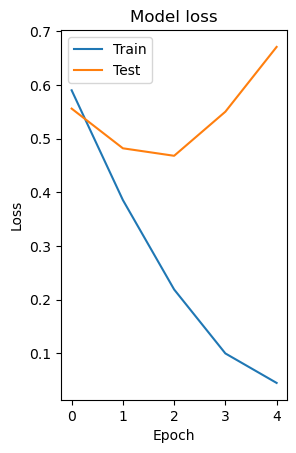

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
# Save the model weights
model.save_weights('model_weights.h5')

In [ ]:
# Create a new model with the same structure
new_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Why do we need to create a new model with the same structure?

When we save the weights of a model, we're only saving the parameters learned during training, not the architecture of the model itself. The weights are saved in the order they appear in the model, without any information about which layer they belong to or what the shape of the layer is.

When we load the weights, the program needs to know how to correctly distribute these weights back to the appropriate layers. Therefore, we need to create a new model with the same architecture as the original model so that the weights can be correctly matched to their corresponding layers.

If we try to load weights into a model with a different architecture, we'll get an error because the program won't know how to match the weights to the layers.

If we want to save both the architecture and the weights of the model, we can use model.save('model.h5') to save the entire model, and then use tf.keras.models.load_model('model.h5') to load it. This way, we don't need to define the architecture again when we load the model.

In [ ]:
# Load the weights into the new model
new_model.load_weights('model_weights.h5')

# Compile the new model
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Now you can use the new model to make predictions
# Let's say we have a new review (already preprocessed and converted to sequences)
new_review = X_test[0]  # just an example, replace with your actual data

In [ ]:
# Since the model expects input in batches, we need to add an extra dimension
new_review = new_review.reshape(1, -1)

In [ ]:
# Use the model to predict the sentiment of the new review
prediction = new_model.predict(new_review)

1/1 [==============================] - 0s 164ms/step


In [ ]:
# The output is a value between 0 and 1 thanks to the sigmoid activation function
# We can convert this to a more human-readable format
if prediction < 0.5:
    print("This review is negative.")
else:
    print("This review is positive.")

This review is negative.
